In [7]:
from haliax.cosmology import ThermodynamicParticle, sm_sqrt_gstar, sm_entropy_density
from haliax.dm_models import HiggsPortal, KineticMixing, ConstantThermalCrossSection
from haliax.constants import plank_mass as mpl
from haliax.diffeq import ODESolution

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

In [2]:
model = KineticMixing(1e3, 4e3, 1.0, 1e-3)

In [150]:
class ModelAnalysis(object):
    def __init__(self, model):
        self.model = model
        self.xs = np.logspace(0, 2, num=200)
        self.__logf = self.__compute_logf()
        self.__dlogfdlogx = self.__logf.derivative(n=1)
        self.__d2logfd2logx = self.__logf.derivative(n=2)
        self.chi = ThermodynamicParticle(self.model.mx, 2.0, 1)
    
    def __compute_logf(self):
        mx = self.model.mx        
        pf = np.sqrt(np.pi / 45.0) * mx * mpl
        
        facs = np.array([sm_sqrt_gstar(mx / x) / x**2 * 
                         self.model.thermal_cross_section(x) 
                         for x in self.xs])
        return UnivariateSpline(np.log(self.xs), np.log(pf * facs))
    
    def f(self, x):
        return np.exp(self.__logf(np.log(x)))
    
    def Q(self, x):
        mx = self.model.mx
        T = mx / x
        yeq = self.chi.neq(T) / sm_entropy_density(T)
        return yeq * self.f(x)
    
    def P(self, x):
        t1 = self.__dlogfdlogx(np.log(x))
        t2 = self.__d2logfd2logx(np.log(x)) - t1
        #term3 = term2 + term1
        return 0.75 * (t1/x)**2 - 0.5 * (t2/x**2)

In [169]:
model = KineticMixing(1e3, 4e3, 1.0, 1e-3)
analysis = ModelAnalysis(model)

sol = model.solve_boltzmann(xstart=1,xend=100, reltol=1e-8, abstol=1e-8, alg="radau")

yeqs = np.array([analysis.chi.neq(analysis.model.mx * np.exp(-logx)) / sm_entropy_density(analysis.model.mx * np.exp(-logx)) for logx in sol.t])

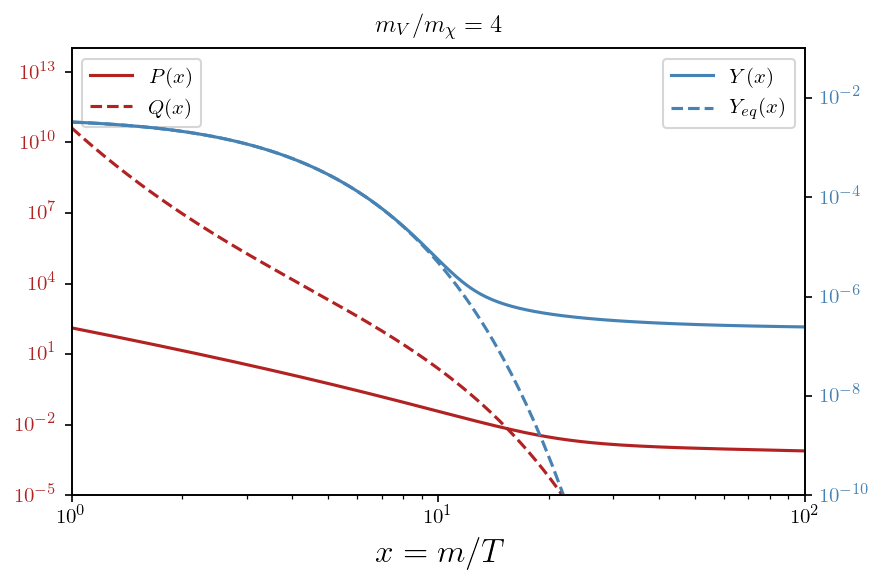

In [172]:
Ps = np.array([analysis.P(x) for x in analysis.xs])
Qs = np.array([analysis.Q(x) for x in analysis.xs])


fig, ax1 = plt.subplots()
fig.dpi=150

color = 'firebrick'
ax1.plot(analysis.xs, np.abs(Ps), label=r'$P(x)$', ls='-',c='firebrick')
ax1.plot(analysis.xs, Qs, label=r'$Q(x)$', ls='--',c='firebrick')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$x=m/T$',fontsize=16)
ax1.set_xlim([1,100])
ax1.set_ylim([1e-5,1e14])
ax1.legend(loc=2)
ax1.set_title(r'$m_{V}/m_{\chi} = 4$')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'steelblue'
#ax2.set_ylabel(r'Y(x)', fontsize=16, color=color)  # we already handled the x-label with ax1
ax2.plot(np.exp(sol.t), np.exp([u[0] for u in sol.u]), color=color, label=r'$Y(x)$')
ax2.plot(np.exp(sol.t), yeqs, color=color, ls='--', label=r'$Y_{eq}(x)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.set_ylim([1e-10,1e-1])
ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('BoltzmanAsymAnalysis/mv_mx_4.pdf')

In [163]:
model = KineticMixing(1e3, 2e3, 1.0, 1e-3)
analysis = ModelAnalysis(model)

sol = model.solve_boltzmann(xstart=1,xend=100, reltol=1e-8, abstol=1e-8, alg="radau")
print(sol.retcode)

yeqs = np.array([analysis.chi.neq(analysis.model.mx * np.exp(-logx)) / sm_entropy_density(analysis.model.mx * np.exp(-logx)) for logx in sol.t])

Retcode.Success


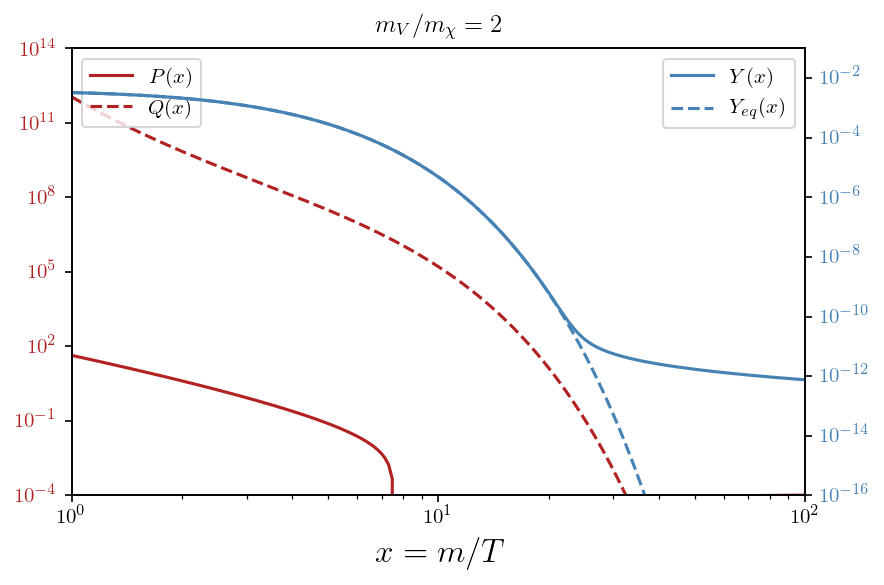

In [164]:
Ps = np.array([analysis.P(x) for x in analysis.xs])
Qs = np.array([analysis.Q(x) for x in analysis.xs])


fig, ax1 = plt.subplots()
fig.dpi=150

color = 'firebrick'
ax1.plot(analysis.xs, Ps, label=r'$P(x)$', ls='-',c='firebrick')
ax1.plot(analysis.xs, Qs, label=r'$Q(x)$', ls='--',c='firebrick')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$x=m/T$',fontsize=16)
ax1.set_xlim([1,100])
ax1.set_ylim([1e-4,1e14])
ax1.legend(loc=2)
ax1.set_title(r'$m_{V}/m_{\chi} = 2$')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'steelblue'
#ax2.set_ylabel(r'Y(x)', fontsize=16, color=color)  # we already handled the x-label with ax1
ax2.plot(np.exp(sol.t), np.exp([u[0] for u in sol.u]), color=color, label=r'$Y(x)$')
ax2.plot(np.exp(sol.t), yeqs, color=color, ls='--', label=r'$Y_{eq}(x)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.set_ylim([1e-16,1e-1])
ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('BoltzmanAsymAnalysis/mv_mx_2.pdf')

In [165]:
model = KineticMixing(1e3, 5e2, 1.0, 1e-3)
analysis = ModelAnalysis(model)

sol = model.solve_boltzmann(xstart=1,xend=100, reltol=1e-8, abstol=1e-8, alg="radau")

yeqs = np.array([analysis.chi.neq(analysis.model.mx * np.exp(-logx)) / sm_entropy_density(analysis.model.mx * np.exp(-logx)) for logx in sol.t])

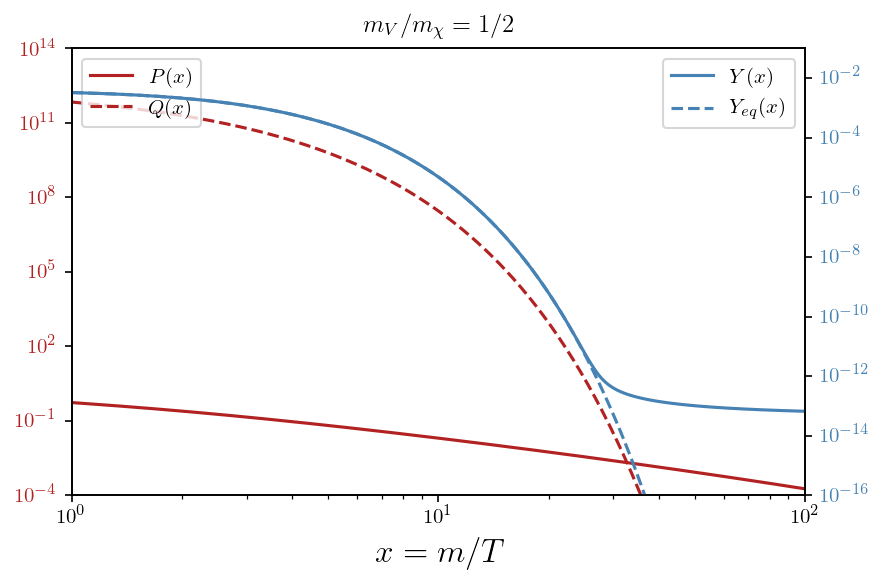

In [166]:
Ps = np.array([analysis.P(x) for x in analysis.xs])
Qs = np.array([analysis.Q(x) for x in analysis.xs])


fig, ax1 = plt.subplots()
fig.dpi=150

color = 'firebrick'
ax1.plot(analysis.xs, Ps, label=r'$P(x)$', ls='-',c='firebrick')
ax1.plot(analysis.xs, Qs, label=r'$Q(x)$', ls='--',c='firebrick')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$x=m/T$',fontsize=16)
ax1.set_xlim([1,100])
ax1.set_ylim([1e-4,1e14])
ax1.legend(loc=2)
ax1.set_title(r'$m_{V}/m_{\chi} = 1/2$')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'steelblue'
#ax2.set_ylabel(r'Y(x)', fontsize=16, color=color)  # we already handled the x-label with ax1
ax2.plot(np.exp(sol.t), np.exp([u[0] for u in sol.u]), color=color, label=r'$Y(x)$')
ax2.plot(np.exp(sol.t), yeqs, color=color, ls='--', label=r'$Y_{eq}(x)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.set_ylim([1e-16,1e-1])
ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('BoltzmanAsymAnalysis/mv_mx_05.pdf')

In [167]:
model = KineticMixing(1e3, 10e3, 1.0, 1e-3)
analysis = ModelAnalysis(model)

sol = model.solve_boltzmann(xstart=1,xend=100, reltol=1e-8, abstol=1e-8, alg="radau")

yeqs = np.array([analysis.chi.neq(analysis.model.mx * np.exp(-logx)) / sm_entropy_density(analysis.model.mx * np.exp(-logx)) for logx in sol.t])

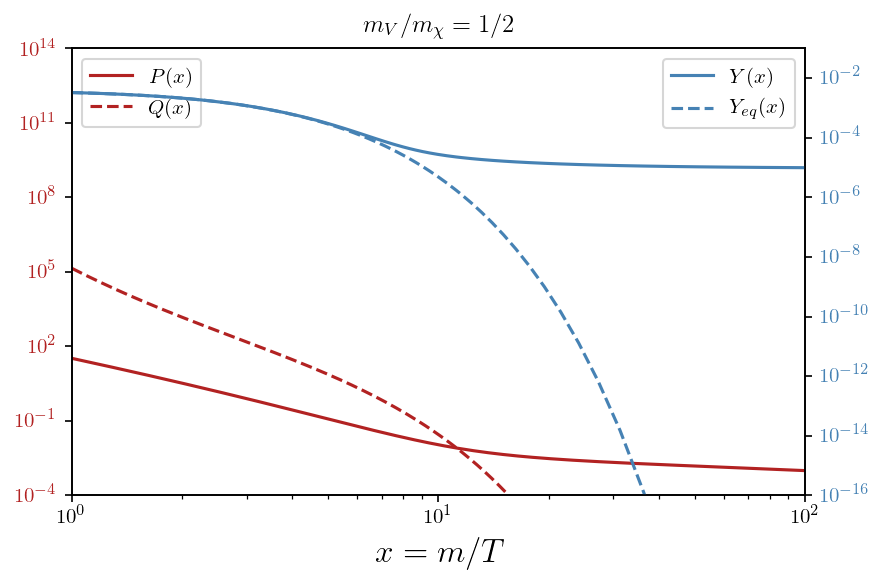

In [168]:
Ps = np.array([analysis.P(x) for x in analysis.xs])
Qs = np.array([analysis.Q(x) for x in analysis.xs])


fig, ax1 = plt.subplots()
fig.dpi=150

color = 'firebrick'
ax1.plot(analysis.xs, Ps, label=r'$P(x)$', ls='-',c='firebrick')
ax1.plot(analysis.xs, Qs, label=r'$Q(x)$', ls='--',c='firebrick')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$x=m/T$',fontsize=16)
ax1.set_xlim([1,100])
ax1.set_ylim([1e-4,1e14])
ax1.legend(loc=2)
ax1.set_title(r'$m_{V}/m_{\chi} = 1/2$')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'steelblue'
#ax2.set_ylabel(r'Y(x)', fontsize=16, color=color)  # we already handled the x-label with ax1
ax2.plot(np.exp(sol.t), np.exp([u[0] for u in sol.u]), color=color, label=r'$Y(x)$')
ax2.plot(np.exp(sol.t), yeqs, color=color, ls='--', label=r'$Y_{eq}(x)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.set_ylim([1e-16,1e-1])
ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('BoltzmanAsymAnalysis/mv_mx_10.pdf')

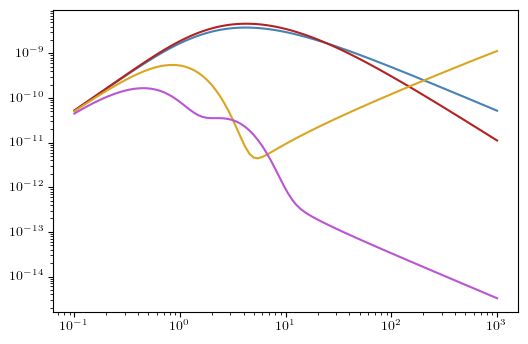

In [2]:
xs = np.logspace(-1, 3, num=100)

mss = [5e2, 1e3, 2e3, 3e3]
hps = [HiggsPortal(1e3, ms, 1.0, 1e-3) for ms in mss]
tcs = [np.array([hp.thermal_cross_section(x) for x in xs]) for hp in hps]

plt.figure(dpi=100)
for i, mv in enumerate(mss):
    plt.plot(xs, tcs[i])
plt.yscale('log')
plt.xscale('log')

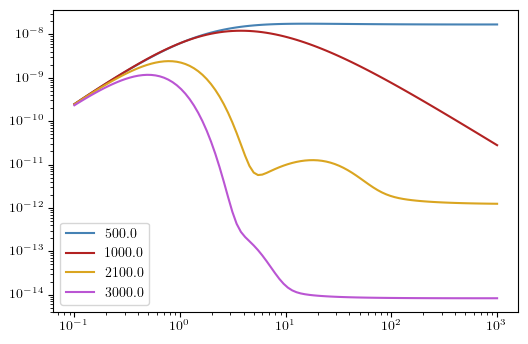

In [4]:
xs = np.logspace(-1, 3, num=100)

mvs = [5e2, 1e3, 2.1e3, 3e3]
kms = [KineticMixing(1e3, mv, 1.0, 1e-3) for mv in mvs]
tcs = [np.array([km.thermal_cross_section(x) for x in xs]) for km in kms]

plt.figure(dpi=100)
for i, mv in enumerate(mvs):
    plt.plot(xs, tcs[i], label=mv)
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [5]:
epss = np.logspace(-5, 0, 25)
mvs = np.logspace(1, 3, 25)

In [6]:
model = KineticMixing(1e2, 2.3e3, 1.0, 1e-3)

In [20]:
%timeit -n 20 -r 3 model.relic_density(abstol=1e-5,reltol=1e-5,alg='rodas')
%timeit -n 20 -r 3 model.relic_density(abstol=1e-5,reltol=1e-5,alg='radaus')

#print(model.relic_density(abstol=1e-5,reltol=1e-5,alg='rodas'))
#print(model.relic_density(abstol=1e-5,reltol=1e-5,alg='radau'))

75.7 ms ± 814 µs per loop (mean ± std. dev. of 3 runs, 20 loops each)
68 ms ± 1.49 ms per loop (mean ± std. dev. of 3 runs, 20 loops each)


In [33]:
rds = [[KineticMixing(1e2, mv, 1.0, eps).relic_density() for eps in epss] for mv in mvs]

Text(0.5, 0, '$m_{V} \\ (\\mathrm{GeV})$')

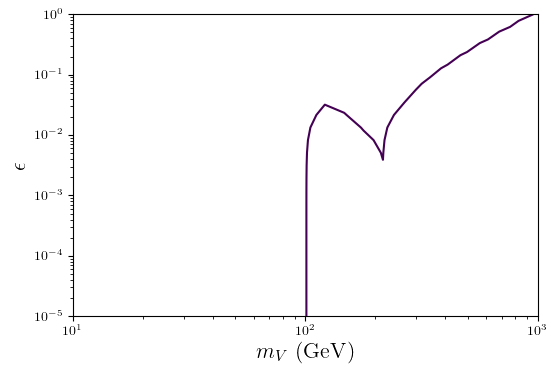

In [34]:
plt.figure(dpi=100)
plt.contour(mvs, epss, np.array(rds).T, levels=[0.12])
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\epsilon$', fontsize=16)
plt.xlabel(r'$m_{V} \ (\mathrm{GeV})$', fontsize=16)

In [25]:
sigmav_max = 8.56656e16 * 6e-26
sigmav_min = 0.0

In [26]:
mxs = np.logspace(-1, 4, 100)
sigmavs = np.linspace(sigmav_min, sigmav_max, 50)

In [38]:
rds = np.array([[ConstantThermalCrossSection(mx, sigmav, 0).relic_density(1.0, 500.0, 1e-6, 1e-6) for sigmav in sigmavs] for mx in mxs])

Text(0.5, 0, '$m_{\\chi} \\ (\\mathrm{GeV})$')

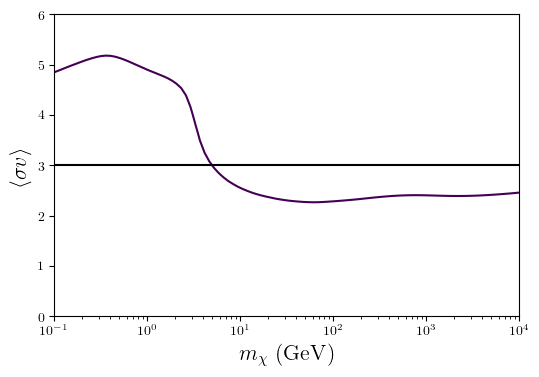

In [39]:
plt.figure(dpi=100)
plt.contour(mxs, 1.16733e-17 * 1e26 * sigmavs, np.array(rds).T, levels=[0.11])
plt.xscale('log')
plt.hlines(3, np.min(mxs), np.max(mxs))
plt.ylabel(r'$\langle\sigma v\rangle$', fontsize=16)
plt.xlabel(r'$m_{\chi} \ (\mathrm{GeV})$', fontsize=16)

In [81]:
def Q(x, model):
    chi = ThermodynamicParticle(model.mx, 2.0, 1)
    T = model.mx / x
    cs = model.thermal_cross_section(x, "all", "all")
    yeq = chi.neq(T) / sm_entropy_density(T)
    return np.sqrt(np.pi / 45.0) * 1.220910e19 * sm_sqrt_gstar(T) * T * cs * yeq / x

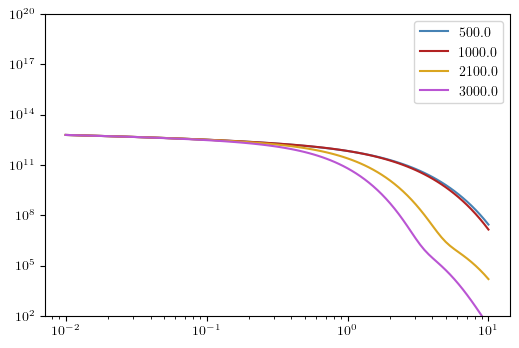

In [82]:
xs = np.logspace(-2, 1, num=100)

mvs = [5e2, 1e3, 2.1e3, 3e3]
kms = [KineticMixing(1e3, mv, 1.0, 1e-3) for mv in mvs]
tcs = [np.array([Q(x, km) for x in xs]) for km in kms]

plt.figure(dpi=100)
for i, mv in enumerate(mvs):
    plt.plot(xs, tcs[i], label=mv)
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e2, 1e20])
plt.legend()